In [8]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Uploading dataset
df= pd.read_csv("time_series_2019-ncov-Confirmed.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province/State  325 non-null    object
 1   Country/Region  487 non-null    object
 2   Lat             487 non-null    object
 3   Long            487 non-null    object
 4   1/22/20         487 non-null    int64 
 5   1/23/20         487 non-null    int64 
 6   1/24/20         487 non-null    int64 
 7   1/25/20         487 non-null    int64 
 8   1/26/20         487 non-null    int64 
 9   1/27/20         487 non-null    int64 
 10  1/28/20         487 non-null    int64 
 11  1/29/20         487 non-null    int64 
 12  1/30/20         487 non-null    int64 
 13  1/31/20         487 non-null    int64 
 14  02-01-2020      487 non-null    int64 
 15  02-02-2020      487 non-null    int64 
 16  02-03-2020      487 non-null    int64 
 17  02-04-2020      487 non-null    int64 
 18  02-05-2020

In [6]:
type( df['1/22/20'].value_counts() )

pandas.core.series.Series

In [7]:
ds= df['1/22/20'].value_counts()
ds

0      458
1       12
2        6
4        3
5        2
444      1
26       1
14       1
10       1
9        1
6        1
Name: 1/22/20, dtype: int64

In [10]:
ds[0]

458

In [12]:
df.shape

(487, 65)

# Day-wise Analysis

In [14]:
new_df= df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
new_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,2,3,5,7,8,8,14,14,14,19,...,75,82,114,147,177,212,272,322,411,599
1,2,1,2,2,4,4,7,7,11,15,...,701,773,839,825,878,889,924,963,1007,1086
2,0,1,3,3,4,5,7,7,10,13,...,200,212,226,243,266,313,345,385,432,455
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,0,0,0,3,4,4,4,7,8,8,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
row, col= new_df.shape

In [15]:
d={}  #dictionary keeping record of daily basis corona patients in all countries
bound= 0.7*487    #70% of total countries out there
i=0
new= pd.DataFrame()
for item in new_df.iteritems():
    a= item[0]
    b=df[a]
    info= b.value_counts()
    val= info[0]
    if val<bound:
        new.insert(i,a,b)
        i=i+1
        key= a[:5]
        if key.endswith('/'):
            key= key[:4]
        else:
            key= key[0:2] + '/' + key[3:5]
        d[key]= sum(b)

In [16]:
# DataFrame of countries where more than 30% countries are corona victim
new

,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
totalCases= sum(d.values())
totalCases

3214428

In [19]:
# calculating parameters for plotting pie chart
sizes= d.values()
labels= d.keys()
explode= [0.5 for i in range( len(d) )]

Date-wise Data Analysis of Covid-19 


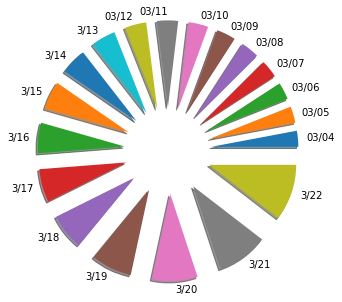

In [20]:
# Plot
print("Date-wise Data Analysis of Covid-19 ")
plt.pie(sizes, labels=labels, shadow=True, explode=explode)
plt.show()

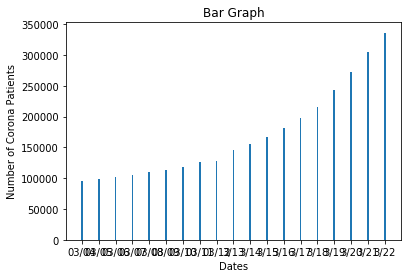

In [21]:
plt.bar(labels,sizes, width=0.1, align="center")
plt.xlabel("Dates")
plt.ylabel("Number of Corona Patients")
plt.title("Bar Graph")
plt.show()

# Country-wise Analysis

In [21]:
i=0
sum_country=[] #sum of all patients in all countries
new_df= new_df.fillna(0)
for date,item in new_df.iterrows():
    sum_country.append(sum(item))

In [22]:
countryNames= [x for x in df['Country/Region']]

In [27]:
dict_cntry={} #keeping record of country and total no. of corona patients in it.
for i in range(row):
    dict_cntry[countryNames[i]]= sum_country[i]

In [38]:
dict_cntry.items()

dict_items([('Thailand', 4035), ('Japan', 16564), ('Singapore', 6560), ('Nepal', 59), ('Malaysia', 8891), ('Canada', 2), ('Australia', 48), ('Cambodia', 372), ('Sri Lanka', 497), ('Germany', 136101), ('Finland', 3871), ('United Arab Emirates', 1965), ('Philippines', 2252), ('India', 2373), ('Italy', 438821), ('Sweden', 15544), ('Spain', 157432), ('Belgium', 17923), ('Egypt', 2350), ('Lebanon', 1738), ('Iraq', 2224), ('Oman', 543), ('Afghanistan', 249), ('Bahrain', 3755), ('Kuwait', 2272), ('Algeria', 991), ('Croatia', 1175), ('Switzerland', 39168), ('Austria', 17715), ('Israel', 5579), ('Pakistan', 3356), ('Brazil', 5596), ('Georgia', 498), ('Greece', 4549), ('North Macedonia', 477), ('Norway', 18392), ('Romania', 2524), ('Estonia', 2331), ('San Marino', 1522), ('Belarus', 547), ('Iceland', 3431), ('Lithuania', 412), ('Mexico', 1126), ('New Zealand', 289), ('Nigeria', 109), ('Ireland', 4176), ('Luxembourg', 2898), ('Monaco', 93), ('Qatar', 4920), ('Ecuador', 2286), ('Azerbaijan', 414),

In [64]:
finalCountryInfo= {}   # if country has less than 1% of total corona cases then it will be merged into 'Others' category. 
for item in dict_cntry.items():
    
    if item[1]< 0.01*totalCases:
        finalCountryInfo['Others']= finalCountryInfo.get('Others',0) + item[1]
    else:
        finalCountryInfo[item[0]]= item[1]

In [67]:
finalCountryInfo

{'Others': 261936,
 'Germany': 136101,
 'Italy': 438821,
 'Spain': 157432,
 'Switzerland': 39168,
 'Iran': 231132,
 'Korea, South': 172802}

In [68]:
name= finalCountryInfo.keys()
print(name)
value= finalCountryInfo.values()
print(value)

n= len(finalCountryInfo)
explodeCountry= [0.3 for i in range(n)]

dict_keys(['Others', 'Germany', 'Italy', 'Spain', 'Switzerland', 'Iran', 'Korea, South'])
dict_values([261936, 136101, 438821, 157432, 39168, 231132, 172802])


Country-wise Data Analysis of Covid-19 


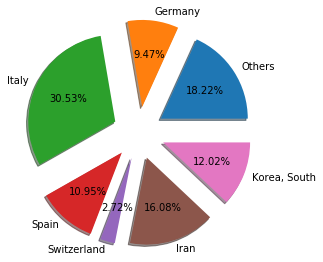

In [69]:
# Plot
print("Country-wise Data Analysis of Covid-19 ")
plt.pie(value, labels= name, explode= explodeCountry, autopct='%2.2f%%', shadow=True)
plt.show()

# Continent-wise Analysis:

In [71]:
# Reading continents and it's countries info dataset 
continent= pd.read_csv("c2c.csv")
continent

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [72]:
conti= {}  #record of continents and countries in it
for a,b in continent.iterrows():
    conti[b[0]]= conti.get(b[0],[]) + [b[1]]
conti

{'Africa': ['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina',
  'Burundi',
  'Cameroon',
  'CapeVerde',
  'CentralAfricanRepublic',
  'Chad',
  'Comoros',
  'Congo',
  'Congo',
  'Djibouti',
  'Egypt',
  'EquatorialGuinea',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'IvoryCoast',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Rwanda',
  'SaoTomeandPrincipe',
  'Senegal',
  'Seychelles',
  'SierraLeone',
  'Somalia',
  'SouthAfrica',
  'SouthSudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Zambia',
  'Zimbabwe'],
 'Asia': ['Afghanistan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Burma(Myanmar)',
  'Cambodia',
  'China',
  'EastTimor',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  '"Korea

In [73]:
continentsName= conti.keys()
contiInfo= dict.fromkeys(continentsName,0) #dictionary having record of corona patients in each continent
for a,b in conti.items(): # Here, a= continent name and b= list of countries in that continent
    for country in b:
        contiInfo[a]= contiInfo.get(a,0) + dict_cntry.get(country,0)
contiInfo

{'Africa': 5496,
 'Asia': 305614,
 'Europe': 888965,
 'North America': 2656,
 'Oceania': 53,
 'South America': 15379}

In [74]:
# Renaming efw continents
contiInfo['N.America']= contiInfo['North America']
contiInfo.pop('North America')

contiInfo['S.America']= contiInfo['South America']
contiInfo.pop('South America')

contiInfo

{'Africa': 5496,
 'Asia': 305614,
 'Europe': 888965,
 'Oceania': 53,
 'N.America': 2656,
 'S.America': 15379}

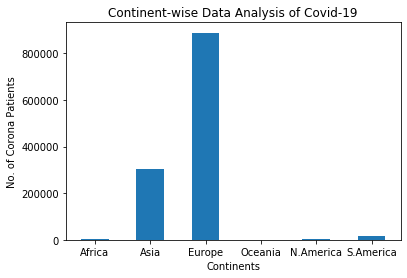

In [75]:
# BarGraph of Continent-wise analysis
plt.bar(contiInfo.keys(), contiInfo.values(), width=0.5, align="center")
plt.xlabel('Continents')
plt.ylabel('No. of Corona Patients')
plt.title('Continent-wise Data Analysis of Covid-19')
plt.show()

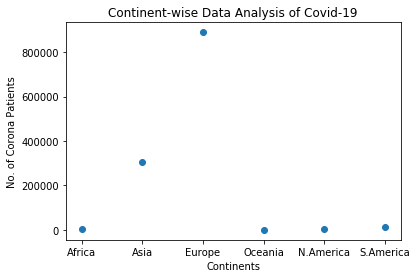

In [78]:
# Scatter plot graph of Continent-wise analysis
plt.scatter(contiInfo.keys(), contiInfo.values())
plt.xlabel('Continents')
plt.ylabel('No. of Corona Patients')
plt.title('Continent-wise Data Analysis of Covid-19')
plt.show()